### **Uczenie Maszynowe, Laboratoria 8 - Programowanie Dynamiczne**
### - Ewaluacja Polityki



---


*Aut. skryptu: Agnieszka Łysak, 10.05.2021*

*   Wzór nr 1: Iteracyjne Równanie Bellmana:







$$ v(s)_\pi =  \sum \limits _{a} \pi(a|s) \sum \limits _{s'} \sum \limits _{r} p(s',r|s,a) [r+\gamma v_\pi(s')]$$

$$↓$$

$$ v(s)_{k+1} =  \sum \limits _{a} \pi(a|s) \sum \limits _{s'} \sum \limits _{r} p(s',r|s,a) [r+\gamma v_k(s')]$$

*   Wzór nr 2: Obliczanie Delty (różnicy w zmianie wartości v):

$$ \Delta = max_a |v_{k+1}(s) - v_k(s) | $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import gym

env = gym.make("FrozenLake-v0", is_slippery=True).env
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [ ]:
env.action_space

Discrete(4)

In [ ]:
env.observation_space

Discrete(16)

In [ ]:
n_states = env.observation_space.n
n_actions = env.action_space.n

In [ ]:
states = list(range(env.observation_space.n))
actions = list(range(env.action_space.n))

In [ ]:
states

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [ ]:
actions

[0, 1, 2, 3]

In [ ]:
def initialize_policy(n_states, n_actions):
  
    policy = np.zeros(shape=(n_states, n_actions)) +  1/n_actions
    
    return policy

policy = initialize_policy(n_states, n_actions)

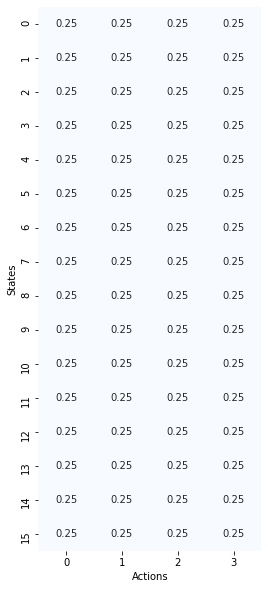

In [ ]:
plt.figure(figsize=(4, 10))
sns.heatmap(policy, cmap="Blues", annot=True, cbar=False)
plt.xlabel("Actions")
plt.ylabel("States")
plt.show()

In [ ]:
V = np.zeros(n_states)
pi = policy
gamma = 1
theta = 0.0001

In [ ]:
env.P[0][1]

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False),
 (0.3333333333333333, 1, 0.0, False)]

In [ ]:
def bellman_update(env, V, pi, s, gamma):
    v = 0.
    for a in actions:
        for p, s_, r, done in env.P[s][a]:
            v += pi[s][a] * p * (r + gamma * V[s_])
    V[s] = v

    #print(s)
    #print(a)
    #print(v)
    #print(s, V[s])

In [ ]:
def evaluate_policy(env, V, pi, gamma, theta):
    delta = float('inf')
    while delta > theta:
        delta = 0
        for s in states:
            v = V[s]
            bellman_update(env, V, pi, s, gamma)
            delta = max(delta, abs(v - V[s]))
            #print(s, delta)
            
    return V

In [ ]:
V = evaluate_policy(env, V, pi, gamma, theta)

plt.figure(figsize=(8, 8))
sns.heatmap(V.reshape(4, 4), cmap="Blues", annot=True, cbar=False)
plt.show

In [ ]:
V

array([0.01362153, 0.01144634, 0.02081586, 0.01037763, 0.01609442,
       0.        , 0.04070908, 0.        , 0.03473223, 0.0881362 ,
       0.1420284 , 0.        , 0.        , 0.17579915, 0.43927396,
       0.        ])

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

print(arr.reshape(2, 4))

[[1 2 3 4]
 [5 6 7 8]]


In [ ]:
def bellman_update(env, V, pi, s, gamma):
    v = 0
    for a in actions:
        for p, s_, r, done in env.P[s][a]:
            v += pi[s][a] * p * (r + gamma * V[s_])
    V[s] = v

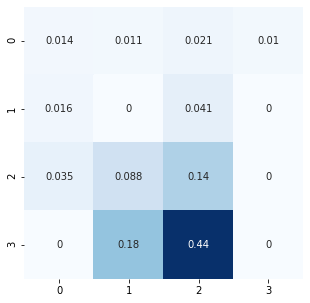

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(V.reshape(4, 4), cmap="Blues", annot=True, cbar=False)

In [ ]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [1]:
# Źródła:
# [1] Richard S. Sutton, Andrew G. Barto, "Reinforcement Learning: An Introduction", second edition, The MIT Press, Cambridge, Massachusetts, London, England, 2018, s. 75
# [2] Deep Learning Wizard, "Dynamic Programming", https://www.deeplearningwizard.com/deep_learning/deep_reinforcement_learning_pytorch/dynamic_programming_frozenlake/